In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data=pd.read_csv('data/csv/cleaned/ta-lion-clean.csv')
data.head

<bound method NDFrame.head of                                                   text  label
0    masuk kabin sebelum take off dan keluar setela...      0
1    petugas lion air memasukkan sampah ke dalam ko...      0
2    Ngantri sejam di check in counter, pelayananny...      0
3    pesawat saya dari pekanbaru ke batam jam 9 pag...      0
4    Kalau masih sayang diri, keluarga, waktu dan k...      0
..                                                 ...    ...
503  pramugari nya ramah ramah. makanan nya enak te...      1
504  Terbang dengan Batik Air 7153 rute CGK-SIN (A3...      1
505  Pertama kali saya naik Batik Air . fasilitasny...      1
506  Pengalaman saya hampir tiap tahun menggunakan ...      1
507  Kalau pakai lion air tidak usah berekspetasi m...      1

[508 rows x 2 columns]>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    508 non-null    object
 1   label   508 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.1+ KB


In [5]:
print('Total Data : ',data.shape[0],' Data\n')
print('Terdiri Dari (Label) : ')
print('[0] Sentimen Negatif\t\t\t:',data[data.label==0].shape[0],' data')
print('[2] Sentimen Positif\t\t\t:',data[data.label==1].shape[0],' data')

Total Data :  508  Data

Terdiri Dari (Label) : 
[0] Sentimen Negatif			: 199  data
[2] Sentimen Positif			: 309  data


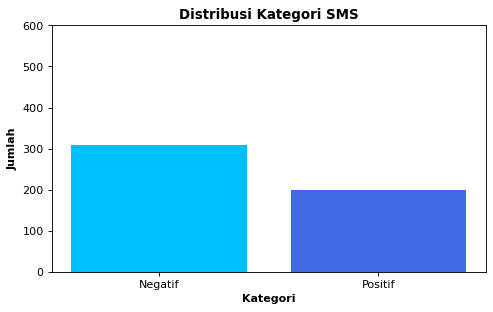

In [6]:
height=data['label'].value_counts()
labels=('Negatif','Positif')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori SMS',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show()

## TEXT PREPROCESSING

### CASE FOLDING

In [7]:
import re

#Create function for case folding sequence
def casefolding(text):
  text=text.lower()
  text=re.sub(r'https?://\S+|www\.\S+','',text)
  text=re.sub(r'[-+]?[0-9]+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=text.strip()
  return text

In [8]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)

Raw Data	:  Luar biasa lion nair. Harga boleh murah, 1,1jt, tapi kena bagasi 6kg hampir separo harga tiket ,hanya berat 6kg. Itupun koper kosong 75% karena kata petugas harus d bagasikan, padahal berat cabin bisa 7kg. Hanya karena koper agak gede katanya.benar2 smart. Hanya satu kata "kapok"
Case Folding	:  luar biasa lion nair harga boleh murah jt tapi kena bagasi kg hampir separo harga tiket hanya berat kg itupun koper kosong  karena kata petugas harus d bagasikan padahal berat cabin bisa kg hanya karena koper agak gede katanyabenar smart hanya satu kata kapok


### WORD NORMALIZATION

In [9]:
key_norm=pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text=' '.join([key_norm[key_norm['singkat']==word]['hasil'].values[0]if(key_norm['singkat']==word).any()else word for word in text.split()])
  text=str.lower(text)
  return text

### FILTERING (STOPWORD REMOVAL)

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind=stopwords.words('indonesian')

In [11]:
len(stopwords_ind)

758

In [12]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [13]:
more_stopword=['jt','kg','d'] # Adding more word in stopword list
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
  clean_words=[]
  text=text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [14]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folding)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	:  Luar biasa lion nair. Harga boleh murah, 1,1jt, tapi kena bagasi 6kg hampir separo harga tiket ,hanya berat 6kg. Itupun koper kosong 75% karena kata petugas harus d bagasikan, padahal berat cabin bisa 7kg. Hanya karena koper agak gede katanya.benar2 smart. Hanya satu kata "kapok"
Case Folding	:  luar biasa lion nair harga boleh murah jt tapi kena bagasi kg hampir separo harga tiket hanya berat kg itupun koper kosong  karena kata petugas harus d bagasikan padahal berat cabin bisa kg hanya karena koper agak gede katanyabenar smart hanya satu kata kapok
Stopword Removal	:  lion nair harga murah kena bagasi separo harga tiket berat itupun koper kosong petugas bagasikan berat cabin koper gede katanyabenar smart kapok


### STEMMING

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory=StemmerFactory()
stemmer=factory.create_stemmer()

#Creating function for Indonesian stemming sequence
def stemming(text):
  text=stemmer.stem(text)
  return text

In [16]:
raw_sample = data['text'].iloc[22]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Luar biasa lion nair. Harga boleh murah, 1,1jt, tapi kena bagasi 6kg hampir separo harga tiket ,hanya berat 6kg. Itupun koper kosong 75% karena kata petugas harus d bagasikan, padahal berat cabin bisa 7kg. Hanya karena koper agak gede katanya.benar2 smart. Hanya satu kata "kapok"
Case folding		:  luar biasa lion nair harga boleh murah jt tapi kena bagasi kg hampir separo harga tiket hanya berat kg itupun koper kosong  karena kata petugas harus d bagasikan padahal berat cabin bisa kg hanya karena koper agak gede katanyabenar smart hanya satu kata kapok
Stopword removal	:  lion nair harga murah kena bagasi separo harga tiket berat itupun koper kosong petugas bagasikan berat cabin koper gede katanyabenar smart kapok
Stemming		:  lion nair harga murah kena bagasi paro harga tiket berat itu koper kosong tugas bagasi berat cabin koper gede katanyabenar smart kapok


### TEXT PREPROCESSING PIPELINE

In [17]:
def text_preprocessing_process(text):
  text=casefolding(text)
  text=text_normalize(text)
  text=remove_stop_words(text)
  text=stemming(text)
  return text

In [18]:
%%time
data['clean_teks']=data['text'].apply(text_preprocessing_process)

CPU times: total: 3min 28s
Wall time: 3min 51s


In [19]:
data

,text,label,clean_teks
0,masuk kabin sebelum take off dan keluar setela...,0,masuk kabin take off landing struktur beranta ...
1,petugas lion air memasukkan sampah ke dalam ko...,0,tugas lion air masuk sampah koper tumpang meng...
2,"Ngantri sejam di check in counter, pelayananny...",0,antri jam cek in alat hitung layan panggil tuj...
3,pesawat saya dari pekanbaru ke batam jam 9 pag...,0,pesawat pekanbaru batam jam pagi rencana batam...
4,"Kalau masih sayang diri, keluarga, waktu dan k...",0,sayang keluarga selamat hindar maskapai pesawa...
...,...,...,...
503,pramugari nya ramah ramah. makanan nya enak te...,1,pramugari nya ramah ramah makan nya enak harga...
504,Terbang dengan Batik Air 7153 rute CGK-SIN (A3...,1,terbang batik air rute cgksin a pklal jam terb...
505,Pertama kali saya naik Batik Air . fasilitasny...,1,kali batik air fasilitas muas modern layan vid...
506,Pengalaman saya hampir tiap tahun menggunakan ...,1,alam maskapai kali bawa grup bal januari alas ...


In [20]:
data.to_csv('data/csv/cleaned/ta_clean_data.csv')

In [21]:
X=data['clean_teks']
y=data['label']

In [22]:
X

0      masuk kabin take off landing struktur beranta ...
1      tugas lion air masuk sampah koper tumpang meng...
2      antri jam cek in alat hitung layan panggil tuj...
3      pesawat pekanbaru batam jam pagi rencana batam...
4      sayang keluarga selamat hindar maskapai pesawa...
                             ...                        
503    pramugari nya ramah ramah makan nya enak harga...
504    terbang batik air rute cgksin a pklal jam terb...
505    kali batik air fasilitas muas modern layan vid...
506    alam maskapai kali bawa grup bal januari alas ...
507    pakai lion air berekspetasi berangkat terbang ...
Name: clean_teks, Length: 508, dtype: object

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
503    1
504    1
505    1
506    1
507    1
Name: label, Length: 508, dtype: int64

### FEATURE EXTRACTION (TF-IDF & N-Gram)

In [24]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

vec_TF_IDF=TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf=vec_TF_IDF.transform(X)
pickle.dump(vec_TF_IDF.vocabulary_,open('feature_tf-idf.pkl','wb'))

In [25]:
vec_TF_IDF.vocabulary_

{'masuk': 1259,
 'kabin': 921,
 'take': 2048,
 'off': 1458,
 'landing': 1123,
 'struktur': 2010,
 'beranta': 251,
 'tumpang': 2214,
 'berisik': 257,
 'nunggu': 1442,
 'bagasi': 156,
 'jam': 849,
 'buruk': 351,
 'tugas': 2205,
 'lion': 1171,
 'air': 27,
 'sampah': 1809,
 'koper': 1067,
 'mengobrak': 1301,
 'abrik': 4,
 'buka': 345,
 'dompet': 559,
 'case': 374,
 'headphone': 743,
 'izin': 831,
 'milik': 1323,
 'barang': 201,
 'tata': 2079,
 'rapih': 1713,
 'rumah': 1782,
 'antri': 103,
 'cek': 379,
 'in': 793,
 'alat': 62,
 'hitung': 765,
 'layan': 1145,
 'panggil': 1517,
 'tuju': 2208,
 'bandara': 179,
 'manokwari': 1247,
 'sorong': 1979,
 'duluan': 572,
 'antre': 102,
 'sela': 1863,
 'terbang': 2118,
 'trsebut': 2199,
 'pas': 1529,
 'dengar': 499,
 'pesawat': 1594,
 'biak': 283,
 'boarding': 310,
 'langsung': 1130,
 'depan': 505,
 'nyalip': 1445,
 'orang': 1483,
 'lari': 1140,
 'gate': 666,
 'close': 413,
 'door': 561,
 'last': 1141,
 'telepon': 2096,
 'nama': 1386,
 'tiket': 2155,
 '

In [26]:
print(len(vec_TF_IDF.get_feature_names()))

2310


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(vec_TF_IDF.get_feature_names())

['aa', 'abang', 'abc', 'abdi', 'abrik', 'absen', 'ac', 'acara', 'access', 'aceh', 'acnya', 'acuh', 'ada', 'adek', 'adi', 'adik', 'adill', 'adisucipto', 'administrasi', 'adu', 'advisormohon', 'aebelum', 'agam', 'agen', 'agung', 'agustus', 'ahli', 'air', 'airasia', 'airbus', 'airfi', 'airhingga', 'airline', 'airlines', 'airpagi', 'airpesawat', 'airport', 'airpramugari', 'airsaya', 'airtidak', 'airwalaupun', 'ajaa', 'ajaib', 'ajak', 'ajar', 'aju', 'akak', 'akan', 'akap', 'akhirakhir', 'akibat', 'akomodasi', 'aksi', 'aktif', 'aktual', 'aku', 'ala', 'alahamdulillahsejak', 'alakadarnya', 'alam', 'alami', 'alas', 'alat', 'alhamdulillah', 'alhamdulillahdetikdetik', 'alhasil', 'alias', 'alih', 'alihalih', 'all', 'allah', 'alor', 'alternatif', 'aluminium', 'alur', 'am', 'amajing', 'aman', 'ambil', 'ambon', 'amdk', 'amit', 'ampun', 'amuk', 'an', 'anak', 'ancam', 'and', 'anda', 'andal', 'aneh', 'anggap', 'angin', 'angkasa', 'angkat', 'angkot', 'angkut', 'anjur', 'anmandi', 'announce', 'antar', 'an

In [28]:
x1=vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf=pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aa,abang,abc,abdi,abrik,absen,ac,acara,access,aceh,...,wowsebuah,wrong,xx,xxx,ya,yaa,yogya,yogyakarta,yup,zenvolution
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.20135,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.057345,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147745,0.0,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
506,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
data_tabular_tf_idf.iloc[10:20,60:70]

,alami,alas,alat,alhamdulillah,alhamdulillahdetikdetik,alhasil,alias,alih,alihalih,all
10,0.000000,0.0,0.284122,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
11,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
12,0.000000,0.0,0.199166,0.0,0.0,0.11243,0.0,0.0,0.0,0.0
13,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
14,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
15,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
16,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
17,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
18,0.281264,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
19,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


### FEATURE SELECTION

In [30]:
x_train=np.array(data_tabular_tf_idf)
y_train=np.array(y)

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features=SelectKBest(chi2,k=2000)
X_kbest_features=chi2_features.fit_transform(x_train,y_train)

print('Original feature number : ',x_train.shape[1])
print('Reduced feature number : ',X_kbest_features.shape[1])

Original feature number :  2310
Reduced feature number :  2000


In [32]:
Data=pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.194333
1,0.076713
2,0.354483
3,0.253578
4,0.060663
...,...
2305,0.020641
2306,0.603612
2307,0.650672
2308,0.381421


In [33]:
feature=vec_TF_IDF.get_feature_names()
feature

Data['Fitur']=feature
Data

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.194333,aa
1,0.076713,abang
2,0.354483,abc
3,0.253578,abdi
4,0.060663,abrik
...,...,...
2305,0.020641,yaa
2306,0.603612,yogya
2307,0.650672,yogyakarta
2308,0.381421,yup


In [34]:
Data.sort_values(by='Nilai',ascending=False)

,Nilai,Fitur
170,19.906479,bal
690,11.411287,golong
2087,11.411287,tegah
982,11.340030,kelas
417,11.248270,cocok
...,...,...
2252,0.000018,update
1527,0.000009,parkir
2051,0.000006,takut
2202,0.000006,ttg


In [35]:
mask=chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
new_feature=[]
for bool, f in zip(mask,feature):
  if bool:
    new_feature.append(f)
  selected_feature=new_feature
selected_feature

['aa',
 'abang',
 'abc',
 'abdi',
 'absen',
 'ac',
 'access',
 'aceh',
 'acnya',
 'acuh',
 'adek',
 'adi',
 'adik',
 'adill',
 'adisucipto',
 'administrasi',
 'adu',
 'advisormohon',
 'aebelum',
 'agam',
 'agung',
 'agustus',
 'air',
 'airasia',
 'airfi',
 'airhingga',
 'airline',
 'airlines',
 'airpagi',
 'airpesawat',
 'airport',
 'airpramugari',
 'airtidak',
 'airwalaupun',
 'ajaa',
 'ajaib',
 'ajak',
 'ajar',
 'aju',
 'akak',
 'akan',
 'akap',
 'akhirakhir',
 'akibat',
 'akomodasi',
 'aksi',
 'aktif',
 'aktual',
 'aku',
 'ala',
 'alahamdulillahsejak',
 'alakadarnya',
 'alami',
 'alas',
 'alat',
 'alhamdulillah',
 'alhamdulillahdetikdetik',
 'alhasil',
 'alias',
 'alih',
 'alihalih',
 'all',
 'allah',
 'alor',
 'alternatif',
 'aluminium',
 'am',
 'amajing',
 'ambil',
 'ambon',
 'amdk',
 'amit',
 'ampun',
 'an',
 'anak',
 'ancam',
 'and',
 'anda',
 'andal',
 'aneh',
 'anggap',
 'angin',
 'angkasa',
 'angkat',
 'angkot',
 'angkut',
 'anjur',
 'anmandi',
 'announce',
 'antar',
 'antisi

In [37]:
new_selected_feature={}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature:
    new_selected_feature[k]=v

new_selected_feature

{'masuk': 1259,
 'kabin': 921,
 'take': 2048,
 'off': 1458,
 'struktur': 2010,
 'beranta': 251,
 'tumpang': 2214,
 'berisik': 257,
 'nunggu': 1442,
 'bagasi': 156,
 'jam': 849,
 'buruk': 351,
 'tugas': 2205,
 'lion': 1171,
 'air': 27,
 'sampah': 1809,
 'koper': 1067,
 'mengobrak': 1301,
 'buka': 345,
 'case': 374,
 'headphone': 743,
 'izin': 831,
 'milik': 1323,
 'barang': 201,
 'tata': 2079,
 'rapih': 1713,
 'rumah': 1782,
 'antri': 103,
 'cek': 379,
 'in': 793,
 'alat': 62,
 'hitung': 765,
 'layan': 1145,
 'panggil': 1517,
 'tuju': 2208,
 'bandara': 179,
 'manokwari': 1247,
 'sorong': 1979,
 'duluan': 572,
 'antre': 102,
 'sela': 1863,
 'terbang': 2118,
 'trsebut': 2199,
 'pas': 1529,
 'pesawat': 1594,
 'biak': 283,
 'boarding': 310,
 'langsung': 1130,
 'depan': 505,
 'nyalip': 1445,
 'orang': 1483,
 'lari': 1140,
 'gate': 666,
 'close': 413,
 'door': 561,
 'last': 1141,
 'telepon': 2096,
 'nama': 1386,
 'tiket': 2155,
 'hangus': 728,
 'refund': 1733,
 'resched': 1750,
 'kena': 997,


In [38]:
len(new_selected_feature)

2000

In [39]:
pickle.dump(new_selected_feature,open('ta-lion-selected_feature_tf-idf.sav','wb'))

In [40]:
data_selected_feature=pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,aa,abang,abc,abdi,absen,ac,access,aceh,acnya,acuh,...,wowlama,wowsebuah,wrong,xx,xxx,ya,yogya,yogyakarta,yup,zenvolution
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.057345,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.147745,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [41]:
data_selected_feature.iloc[10:20,60:70]

,alihalih,all,allah,alor,alternatif,aluminium,am,amajing,ambil,ambon
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083496,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [42]:
selected_x=X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### MODELLING (MACHINE LEARNING)

In [43]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [44]:
x=selected_x
y=data.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
print('Banyak data x_train : ',len(x_train))
print('Banyak data x_test : ',len(x_test))
print('Banyak data y_train : ',len(y_train))
print('Banyak data y_test : ',len(y_test))

Banyak data x_train :  406
Banyak data x_test :  102
Banyak data y_train :  406
Banyak data y_test :  102


In [46]:
from datetime import datetime
start_time=datetime.now()

text_algorithm=MultinomialNB()
model=text_algorithm.fit(x_train,y_train)

filename='model_sentiment_naivechi-ta-lion.sav'
pickle.dump(model,open(filename,'wb'))

end_time=datetime.now()
result_time=end_time-start_time
print("Duration : ",result_time)

Duration :  0:00:00.061961


In [47]:
predicted=model.predict(x_test)
predicted

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

### MODEL EVALUATION

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

NewprediksiBenar=(predicted==y_test).sum()
NewprediksiSalah=(predicted!=y_test).sum()

print('Prediksi Benar : ',NewprediksiBenar,'Data')
print('Prediksi Salah : ',NewprediksiSalah,'Data')
print('Akurasi Algoritma : ',NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,'%')

CM=confusion_matrix(y_test,predicted)

TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")

print(classification_report(y_test,predicted))

Prediksi Benar :  93 Data
Prediksi Salah :  9 Data
Akurasi Algoritma :  91.17647058823529 %
TRUE NEGATIVE (TN): 26
FALSE NEGATIVE (FN): 2
TRUE POSITIVE (TP): 67
FALSE POSITIVE (FP): 7
PRECISION: 90.54054054054053 %
RECALL: 97.10144927536231 %
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.91      0.97      0.94        69

    accuracy                           0.91       102
   macro avg       0.92      0.88      0.89       102
weighted avg       0.91      0.91      0.91       102



In [49]:
# Using Cross Validation to validating data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=2)
accuracy=(cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy=np.mean(accuracy)
print('Accuracy : ',accuracy)
print('Accuracy : ',score_accuracy)

Accuracy :  [0.85294118 0.82352941 0.84313725 0.88235294 0.78431373 0.7254902
 0.7745098  0.75490196 0.79411765 0.78431373]
Accuracy :  0.8019607843137255


In [50]:
import pickle

pipeline=pickle.load(open('model_sentiment_naivechi-ta-lion.sav','rb'))

data_input=input("Masukan Sentimen:\n")
data_input=text_preprocessing_process(data_input)

loaded_vec=TfidfVectorizer(decode_error="replace",vocabulary=set(pickle.load(open('ta-lion-selected_feature_tf-idf.sav','rb'))))
hasil=pipeline.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
  s="Sentimen Negatif"
else:
  s="Sentimen Positif"

print("Hasil Prediksi :\n",s)

Hasil Prediksi :
 Sentimen Positif


In [51]:
filename="model-ta-lion.sav"
pickle.dump(hasil,open(filename,'wb'))